# 1. Introdução 

Clusterização consiste na aplicação de métodos de aprendizado de máquina visando agrupar um conjunto de dados em clusters ou grupos tendo em vista características entre si. Nosso trabalho aqui consiste em criar um modelo que consiga criar uma segmentação de clientes a partir de informações de consumo, nível de educação, idade etc. 

### Dicionário de Variáveis 
O dataset que utilizamos conta com o seguinte dicionário de variáveis:
- ID: identificador único de cada consumidor
- Year_Birth: Data de nascimento do consumidor 
- Education: Nível mais alto de educação alcançado pelo consumidor  
- Marital_Status: Estado civil do consumidor 
- Income: Renda anual do consumidor
- Kidhome: Número de crianças na casa
- Teenhome: Número de adolescentes na casa
- Dt_Customer: Primeiro registro de interação do consumidor na empresa
- Recency: Número de dias desde a última compra ou interação 
- MntWines: Valor gasto com vinhos 
- MntFruits: Valor gasto com frutas
- MntMeatProducts: Valor gasto com produtos de carne 
- MntSweetProducts: Valor gasto com doces
- MntGoldProds: Valor gasto em produtos de ouro 
- NumWebPurchases: Número de compras realizadas atráves do site da empresa
- NumWebVisitsMonth: Número de visitas realizadas no site da empresa
- Complain: Consumidor já realizou uma reclamação (=1) ou não (=0). 
- AcceptedCmp1: Consumidor aceitou a primeira campanha de marketing (=1) ou não aceitou (=0)
- AcceptedCmp5: Consumidor aceitou a quinta campanha de marketing (=1) ou não aceitou (=0)

# 2. Importando as Bibliotecas 

In [274]:
# Bibliotecas para EDA
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

# Mostrar todas as colunas de um dataframe 
pd.set_option('display.max_columns', None)

#PreProcessamento dos Dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_regression
from category_encoders import TargetEncoder, CatBoostEncoder, OrdinalEncoder
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

import warnings
warnings.filterwarnings("ignore")

# 3. Inspeção dos Dados 

In [252]:
# Import do Dataset
df = pd.read_csv("customer_segmentation.csv")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [253]:
# Verificação do tipo de dado de cada variável 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [254]:
# Transformação da variável Dt_Customer para formato Data 
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df['Dt_Customer'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2240 entries, 0 to 2239
Series name: Dt_Customer
Non-Null Count  Dtype         
--------------  -----         
2240 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 17.6 KB


In [255]:
# Proporção de valores nulos por coluna
df.isna().mean()

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 0.010714
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

In [256]:
# Criaçõo de Coluna 
current_year = 2015 #Máxima data presente no Dataset 
df['idade'] = current_year - df['Year_Birth']
df 

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,idade
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,58
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,61
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,50
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,31
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,48
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,69
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,34
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,59


In [257]:
# Estatísticas Descritivas do Dataset 
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,idade
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,46.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,19.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,38.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,45.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,56.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,122.000000


# 4. Análise Exploratória 

## 4.1 Impacto do número de crianças e de adolescentes

Text(0.5, 1.0, 'Distribuição de adolescentes na Amostra')

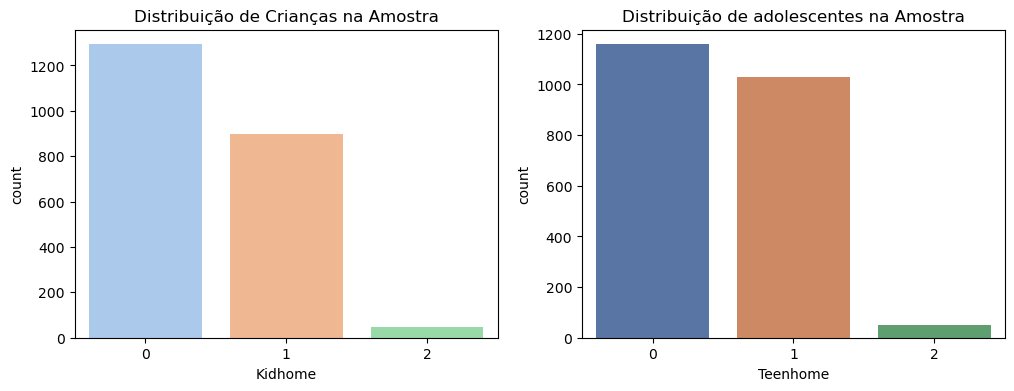

In [219]:
# Definição da Área de Plot 
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Axes [0]
sns.countplot(x='Kidhome', data=df, palette='pastel', ax=ax[0])
ax[0].set_title('Distribuição de Crianças na Amostra')

# Axes [1]
sns.countplot(x='Teenhome', data=df, palette='deep', ax=ax[1])
ax[1].set_title('Distribuição de adolescentes na Amostra')

Text(0.5, 1.0, 'Volume de Doces x Adolescentes ')

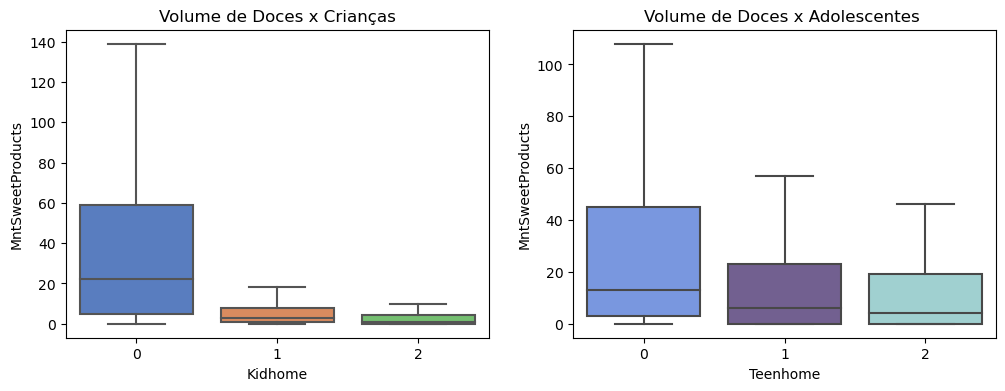

In [220]:
# Definição da Área de Plot 
fig, ax = plt.subplots(1,2, figsize=(12,4))

# Axes [0]
sns.boxplot(x='Kidhome', y='MntSweetProducts',data=df, showfliers=False, palette='muted', ax=ax[0])
ax[0].set_title('Volume de Doces x Crianças')

# Axes [1]
sns.boxplot(x='Teenhome', y='MntSweetProducts',data=df, showfliers=False, palette=colors, ax=ax[1])
ax[1].set_title('Volume de Doces x Adolescentes ')

Comportamento interessante pode ser observado dentro da amostra, famílias que contém crianças apresentam um volume médio e mediano inferior ao de famílias com a presença de adolescentes. Entretanto, ambas os consumidores com crianças ou adolescentes em casa apresentam um volume de compra de doces inferior ao de consumidores sem estes grupos em casa. 

## 4.2 Impacto da Educação em algumas variáveis 

Text(0.5, 1.0, 'Distribuição da amostra por Educação')

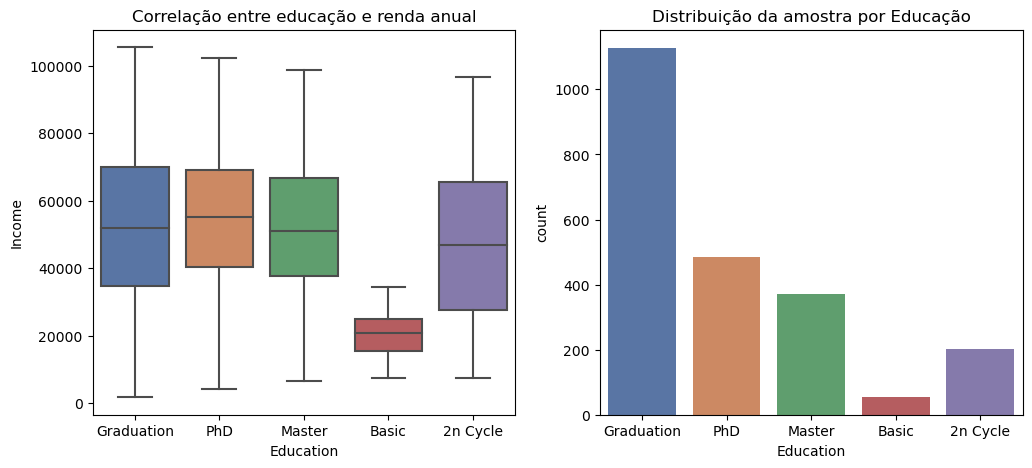

In [221]:
# Definição da Área de Plot 
fig, ax = plt.subplots(1,2, figsize=(12,5))

# Axes [0]
sns.boxplot(x='Education', y='Income', data=df, showfliers=False, palette='deep', ax=ax[0])
ax[0].set_title('Correlação entre educação e renda anual')

# Axes [1]
sns.countplot(x='Education', data=df, palette='deep', ax=ax[1])
ax[1].set_title('Distribuição da amostra por Educação')

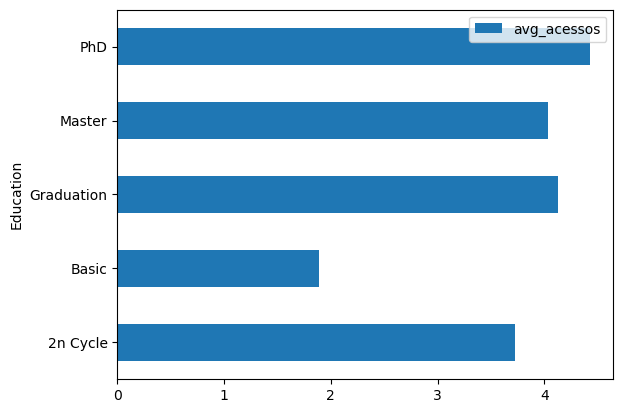

In [222]:
# Base de Acessos agrupados por 
education = df.groupby('Education').agg(avg_acessos=('NumWebPurchases', 'mean'))
complain = df.groupby('Complain').agg(avg_reclamacao=('Complain', 'mean'))

#Plot do Gráfico
ax = education.plot(kind='barh', y='avg_acessos')
plt.show()

Text(0.5, 1.0, 'Educação e Consumo de Vinhos')

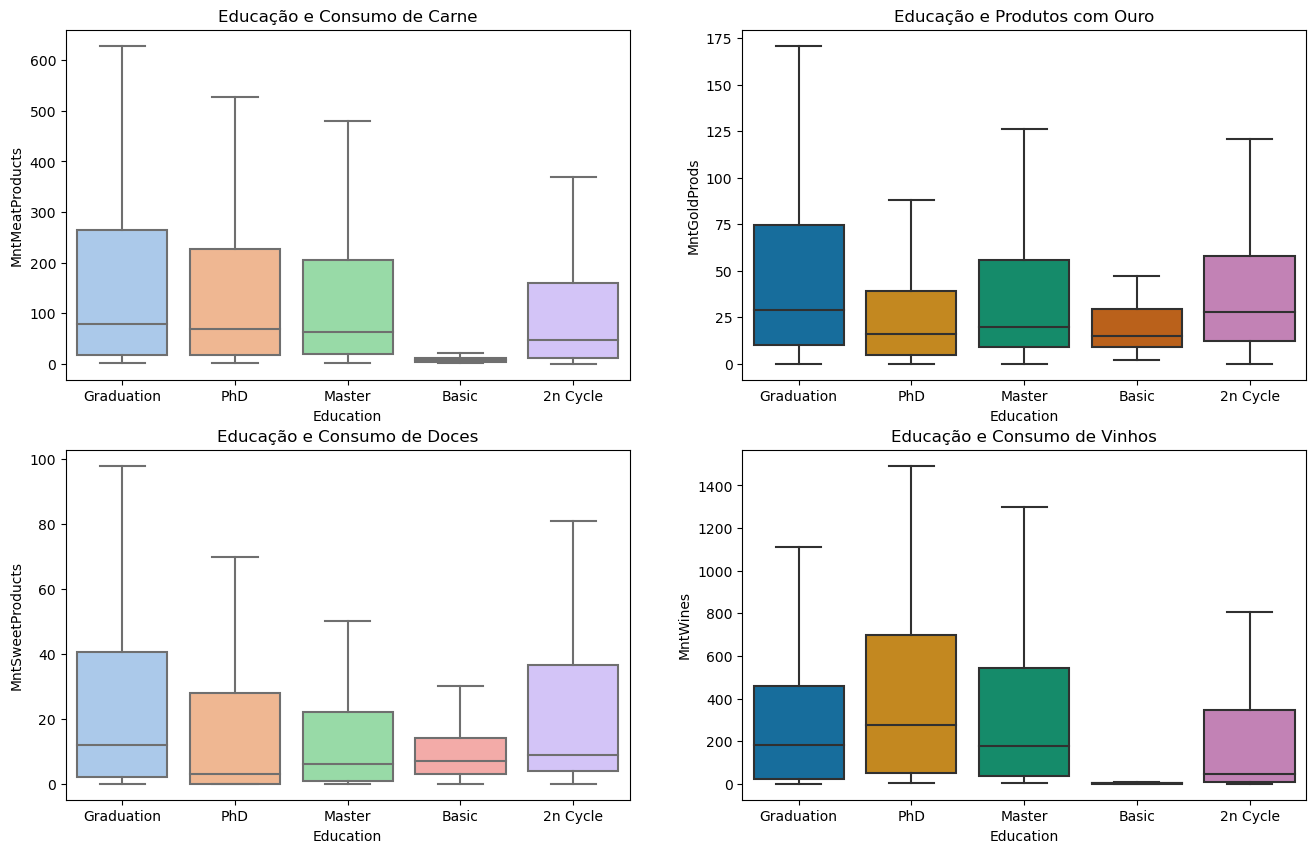

In [223]:
# Definição da Área de Plot 
fig, ax = plt.subplots(2,2, figsize=(16,10))

# Axes [0,0]
sns.boxplot(x='Education', y='MntMeatProducts', data=df, showfliers=False, palette='pastel', ax=ax[0,0])
ax[0,0].set_title('Educação e Consumo de Carne')

# Axes [0,1]
sns.boxplot(x='Education', y='MntGoldProds', data=df, showfliers=False, palette='colorblind', ax=ax[0,1])
ax[0,1].set_title('Educação e Produtos com Ouro')

# Axes [1,0]
sns.boxplot(x='Education', y='MntSweetProducts', data=df, showfliers=False, palette='pastel', ax=ax[1,0])
ax[1,0].set_title('Educação e Consumo de Doces')

# Axes [1,1]
sns.boxplot(x='Education', y='MntWines', data=df, showfliers=False, palette='colorblind', ax=ax[1,1])
ax[1,1].set_title('Educação e Consumo de Vinhos')

## 4.3 Correlação entre as variáveis numéricas

<AxesSubplot:>

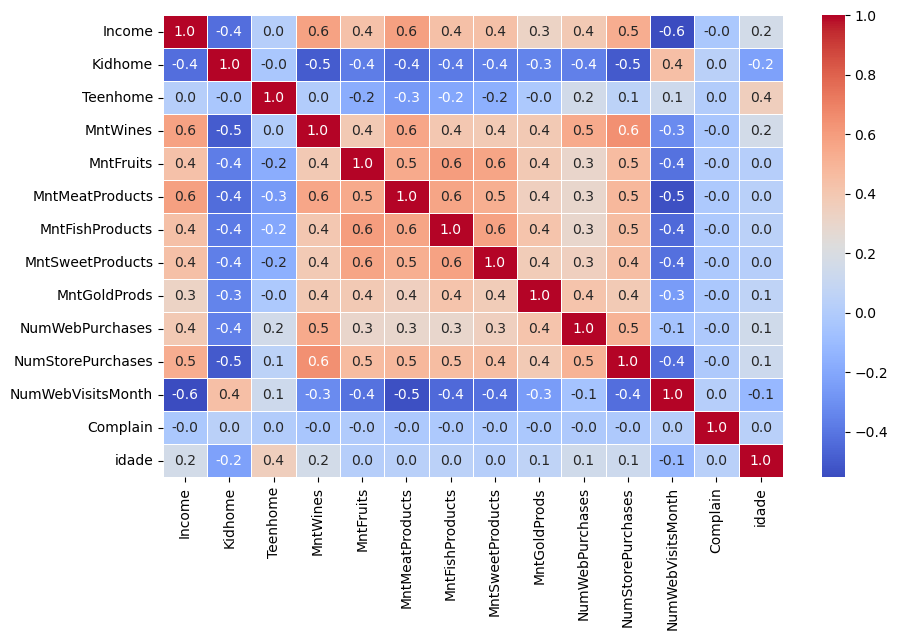

In [224]:
# Correlação das principais variáveis numéricas 
df_corr = df.drop(columns=['ID', 'Year_Birth','Recency','NumDealsPurchases','NumCatalogPurchases', 'AcceptedCmp3', 
                          'AcceptedCmp1','AcceptedCmp2','AcceptedCmp4','AcceptedCmp5', 'Z_CostContact', 'Z_Revenue'
                          , 'Response'], axis=1)
plt.figure(figsize=(10, 6))
correlation = df_corr.corr()
plot_correlation = sns.heatmap(correlation, cmap='coolwarm', annot = True, fmt=".1f", linewidths =.6)
plot_correlation 

## 4.4 Análise dos consumidores com base no uso de ferramentas digitais 

Text(0.5, 1.0, 'Distribuição da amostra por Aceite da 5° Campanha')

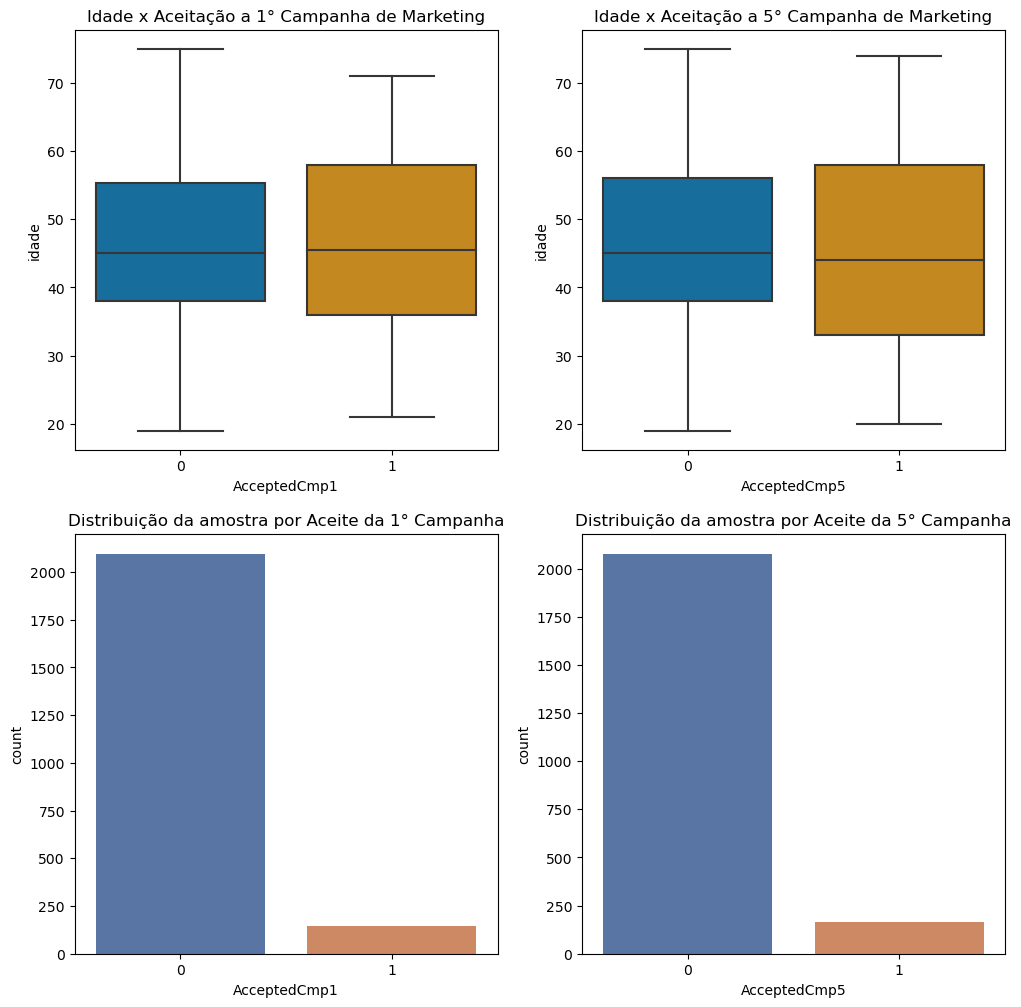

In [225]:
# Definição da Área de Plot 
fig, ax = plt.subplots(2,2, figsize=(12,12))

# Axes [0,0]
sns.boxplot(x='AcceptedCmp1', y='idade',data=df, showfliers=False, palette='colorblind', ax=ax[0,0])
ax[0,0].set_title('Idade x Aceitação a 1° Campanha de Marketing')

# Axes [0,1]
sns.boxplot(x='AcceptedCmp5', y='idade',data=df, showfliers=False, palette='colorblind', ax=ax[0,1])
ax[0,1].set_title('Idade x Aceitação a 5° Campanha de Marketing')

# Axes [1,0]
sns.countplot(x='AcceptedCmp1', data=df, palette='deep', ax=ax[1,0])
ax[1,0].set_title('Distribuição da amostra por Aceite da 1° Campanha')

# Axes [1,1]
sns.countplot(x='AcceptedCmp5', data=df, palette='deep', ax=ax[1,1])
ax[1,1].set_title('Distribuição da amostra por Aceite da 5° Campanha')

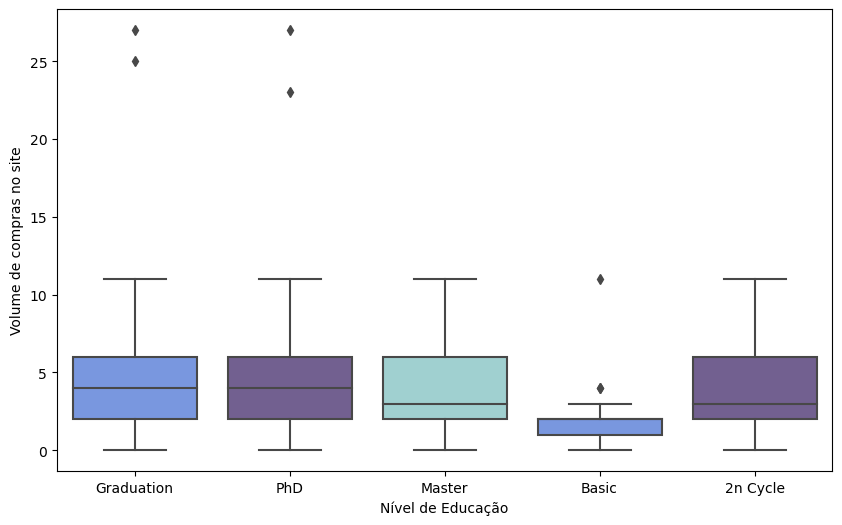

In [226]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(10, 6))
colors = ['#6890F0', '#705898', '#98D8D8']

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
sns.boxplot(x='Education', y='NumWebPurchases',data=df, showfliers=True, palette=colors)
plt.xlabel('Nível de Educação')
plt.ylabel('Volume de compras no site')
plt.show()

## 4.5 Análise dos Consumidores com base no Estado Civil 

Text(0.5, 1.0, 'Estado Civil e Consumo de Vinhos')

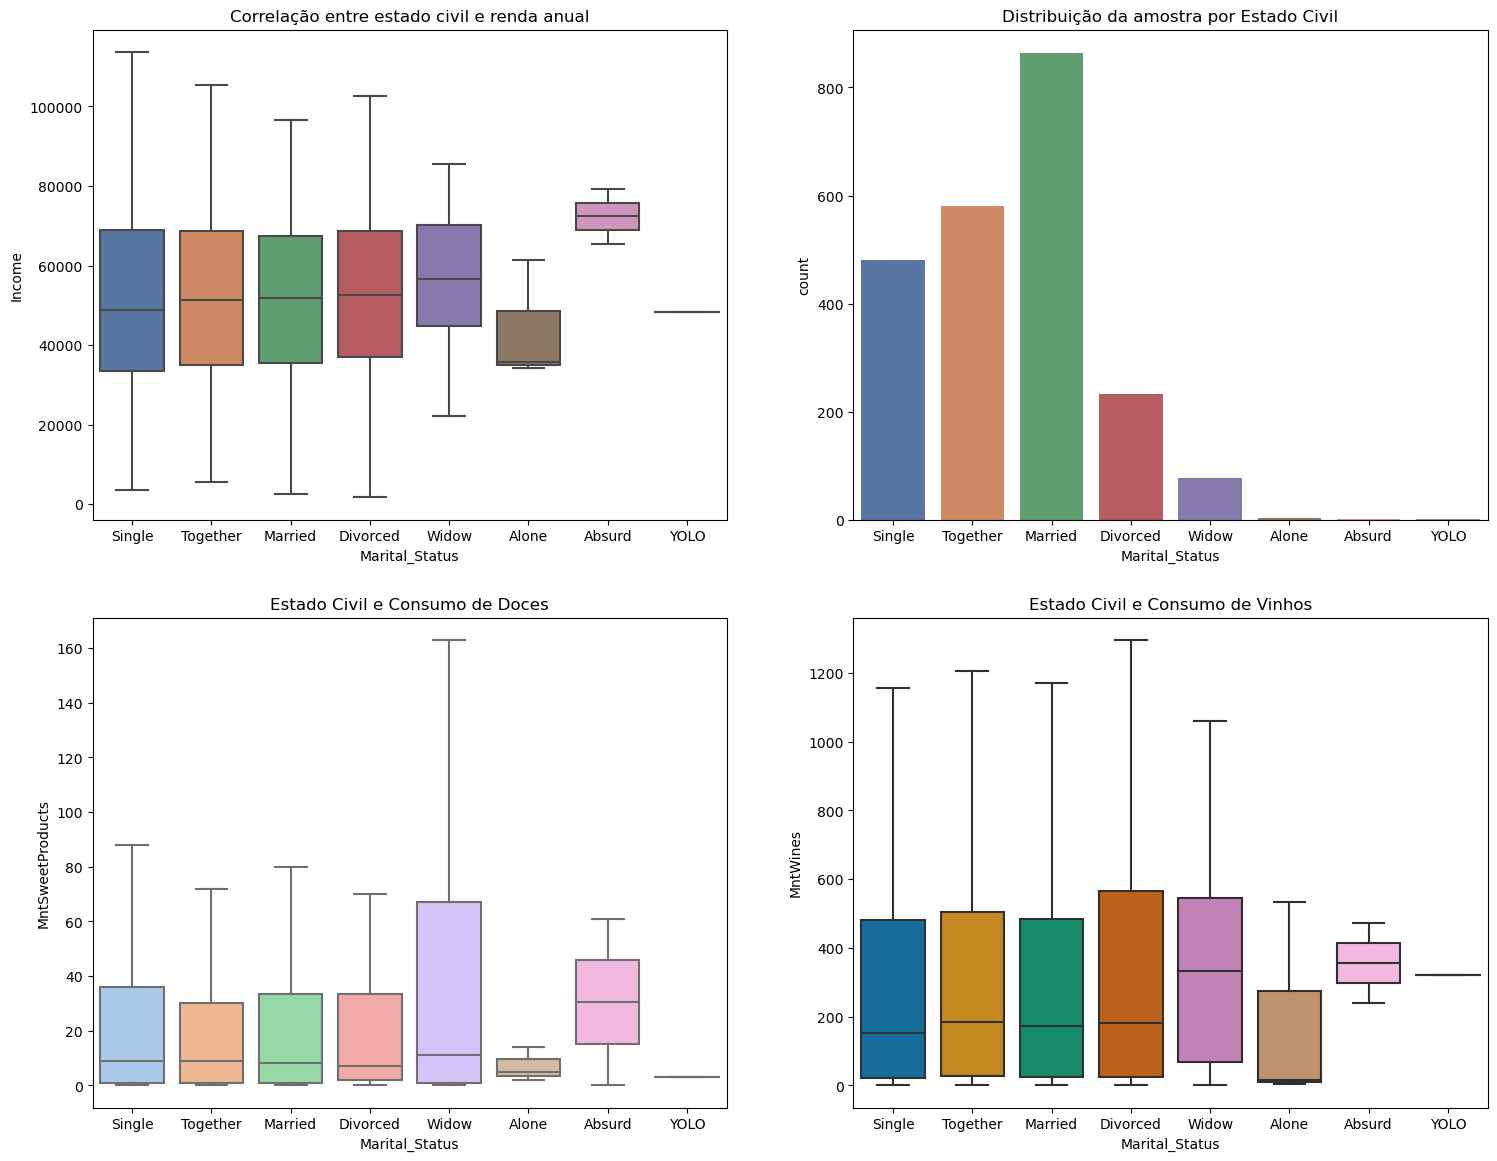

In [227]:
# Definição da Área de Plot 
fig, ax = plt.subplots(2,2, figsize=(18,14))

# Axes [0,0]
sns.boxplot(x='Marital_Status', y='Income', data=df, showfliers=False, palette='deep', ax=ax[0,0])
ax[0,0].set_title('Correlação entre estado civil e renda anual')

# Axes [0,1]
sns.countplot(x='Marital_Status', data=df, palette='deep', ax=ax[0,1])
ax[0,1].set_title('Distribuição da amostra por Estado Civil')

# Axes [1,0]
sns.boxplot(x='Marital_Status', y='MntSweetProducts', data=df, showfliers=False, palette='pastel', ax=ax[1,0])
ax[1,0].set_title('Estado Civil e Consumo de Doces')

# Axes [1,1]
sns.boxplot(x='Marital_Status', y='MntWines', data=df, showfliers=False, palette='colorblind', ax=ax[1,1])
ax[1,1].set_title('Estado Civil e Consumo de Vinhos')

## 5. PreProcessamento 

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [259]:
df = df.drop(columns=['AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp2', 'NumCatalogPurchases', 'ID', 'Year_Birth'
                     , 'Z_CostContact','Z_Revenue', 'Response', 'Dt_Customer'])

In [260]:
# Float em Int 
df['Income'] = df['Income'].dropna()

In [262]:
df['Income'] = df['Income'].fillna(0).astype(int)

In [263]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Education          2240 non-null   object
 1   Marital_Status     2240 non-null   object
 2   Income             2240 non-null   int32 
 3   Kidhome            2240 non-null   int64 
 4   Teenhome           2240 non-null   int64 
 5   Recency            2240 non-null   int64 
 6   MntWines           2240 non-null   int64 
 7   MntFruits          2240 non-null   int64 
 8   MntMeatProducts    2240 non-null   int64 
 9   MntFishProducts    2240 non-null   int64 
 10  MntSweetProducts   2240 non-null   int64 
 11  MntGoldProds       2240 non-null   int64 
 12  NumDealsPurchases  2240 non-null   int64 
 13  NumWebPurchases    2240 non-null   int64 
 14  NumStorePurchases  2240 non-null   int64 
 15  NumWebVisitsMonth  2240 non-null   int64 
 16  AcceptedCmp5       2240 non-null   int64 


In [264]:
# Tratamento das variáveis categóricas
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
ordinal_encoder = OrdinalEncoder()
encoded_data = ordinal_encoder.fit_transform(df[cat_cols])
df[cat_cols] = encoded_data.astype(int)
df

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp5,AcceptedCmp1,Complain,idade
0,1,1,58138,0,0,58,635,88,546,172,88,88,3,8,4,7,0,0,0,58
1,1,1,46344,1,1,38,11,1,6,2,1,6,2,1,2,5,0,0,0,61
2,1,2,71613,0,0,26,426,49,127,111,21,42,1,8,10,4,0,0,0,50
3,1,2,26646,1,0,26,11,4,20,10,3,5,2,2,4,6,0,0,0,31
4,2,3,58293,1,0,94,173,43,118,46,27,15,5,5,6,5,0,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,3,61223,0,1,46,709,43,182,42,118,247,2,9,4,5,0,0,0,48
2236,2,2,64014,2,1,56,406,0,30,0,0,8,7,8,5,7,0,1,0,69
2237,1,4,56981,0,0,91,908,48,217,32,12,24,1,2,13,6,0,0,0,34
2238,3,2,69245,0,1,8,428,30,214,80,30,61,2,6,10,3,0,0,0,59


In [265]:
# Aplicando scaler na base de dados
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df) 

## 5.1 Clusters com K-Means 

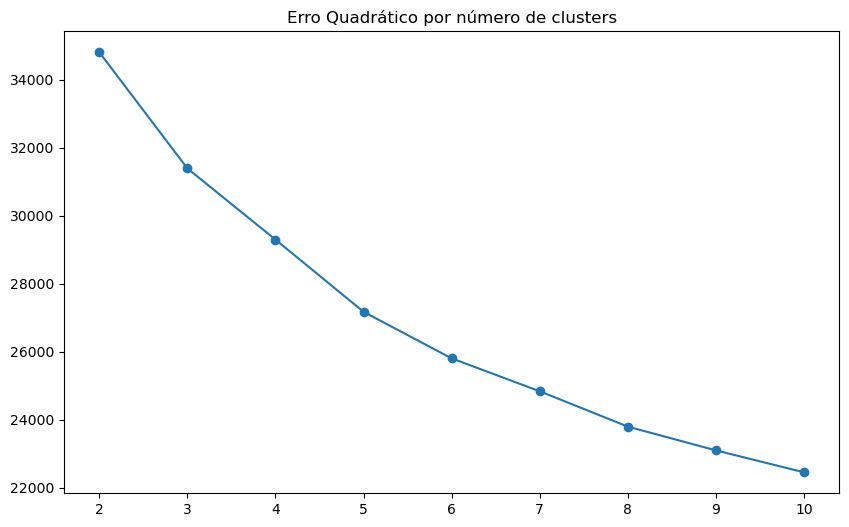

In [266]:
# Validação do número de clusters por erro quadrático 
erro_quadratico = []
for i in range (2,11): 
    km = KMeans(n_clusters = i, random_state=42)
    km.fit(scaled_features)
    erro_quadratico.append(km.inertia_)
    
plt.figure(figsize=(10,6))
plt.plot(range(2,11), erro_quadratico,marker='o')
plt.title("Erro Quadrático por número de clusters")
plt.show()

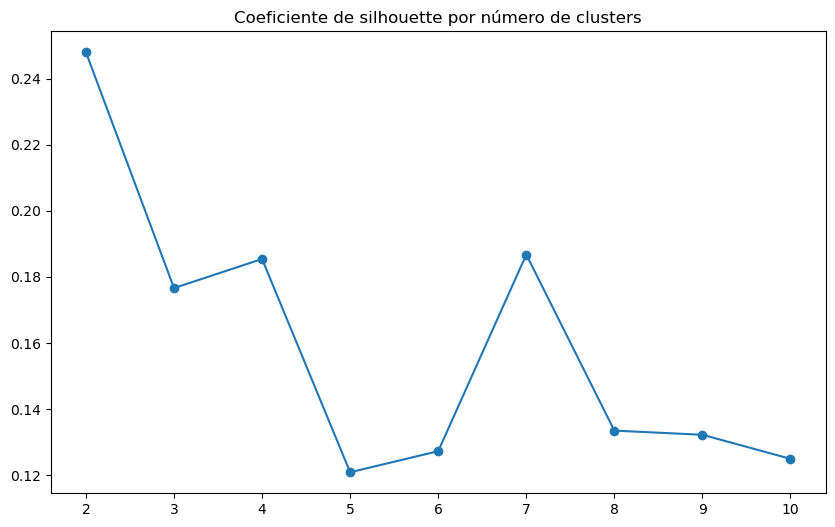

In [275]:
# Validação do número de clusters pela métrica de Silhueta 
silhouette = []
for i in range (2,11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(scaled_features)
    silhouettescore = silhouette_score(scaled_features, kmeans.labels_)
    silhouette.append(silhouettescore)
    
plt.figure(figsize=(10,6))
plt.plot(range(2,11), silhouette,marker='o')
plt.title("Coeficiente de silhouette por número de clusters")
plt.show()

In [276]:
kmeans = KMeans(n_clusters=4, n_init=10, init='random')
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=4)

In [278]:
df_kmeans = df.copy()
df_kmeans['cluster'] = kmeans.labels_

df_kmeans

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp5,AcceptedCmp1,Complain,idade,cluster
0,1,1,58138,0,0,58,635,88,546,172,88,88,3,8,4,7,0,0,0,58,0
1,1,1,46344,1,1,38,11,1,6,2,1,6,2,1,2,5,0,0,0,61,3
2,1,2,71613,0,0,26,426,49,127,111,21,42,1,8,10,4,0,0,0,50,0
3,1,2,26646,1,0,26,11,4,20,10,3,5,2,2,4,6,0,0,0,31,3
4,2,3,58293,1,0,94,173,43,118,46,27,15,5,5,6,5,0,0,0,34,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1,3,61223,0,1,46,709,43,182,42,118,247,2,9,4,5,0,0,0,48,0
2236,2,2,64014,2,1,56,406,0,30,0,0,8,7,8,5,7,0,1,0,69,2
2237,1,4,56981,0,0,91,908,48,217,32,12,24,1,2,13,6,0,0,0,34,0
2238,3,2,69245,0,1,8,428,30,214,80,30,61,2,6,10,3,0,0,0,59,2


## 5.2 Análise das variáveis - Clusters

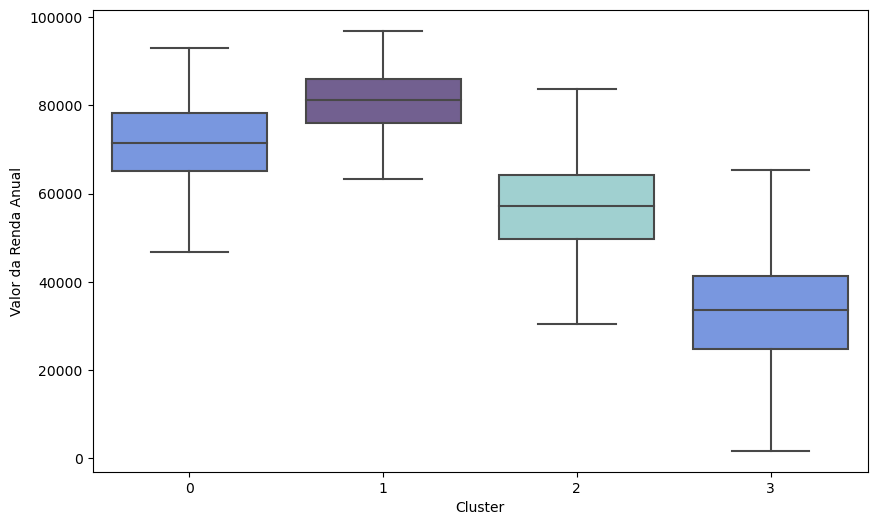

In [285]:
# Tamanho do gráfico em polegadas
plt.figure(figsize =(10, 6))
colors = ['#6890F0', '#705898', '#98D8D8']

#Plotando o boxplot da variável animal em relação ao valor do aluguel 
sns.boxplot(x='cluster', y='Income',data=df_kmeans, showfliers=False, palette=colors)
plt.xlabel('Cluster')
plt.ylabel('Valor da Renda Anual')
plt.show()

Text(0.5, 1.0, 'Cluster e Consumo de Produtos com Ouro')

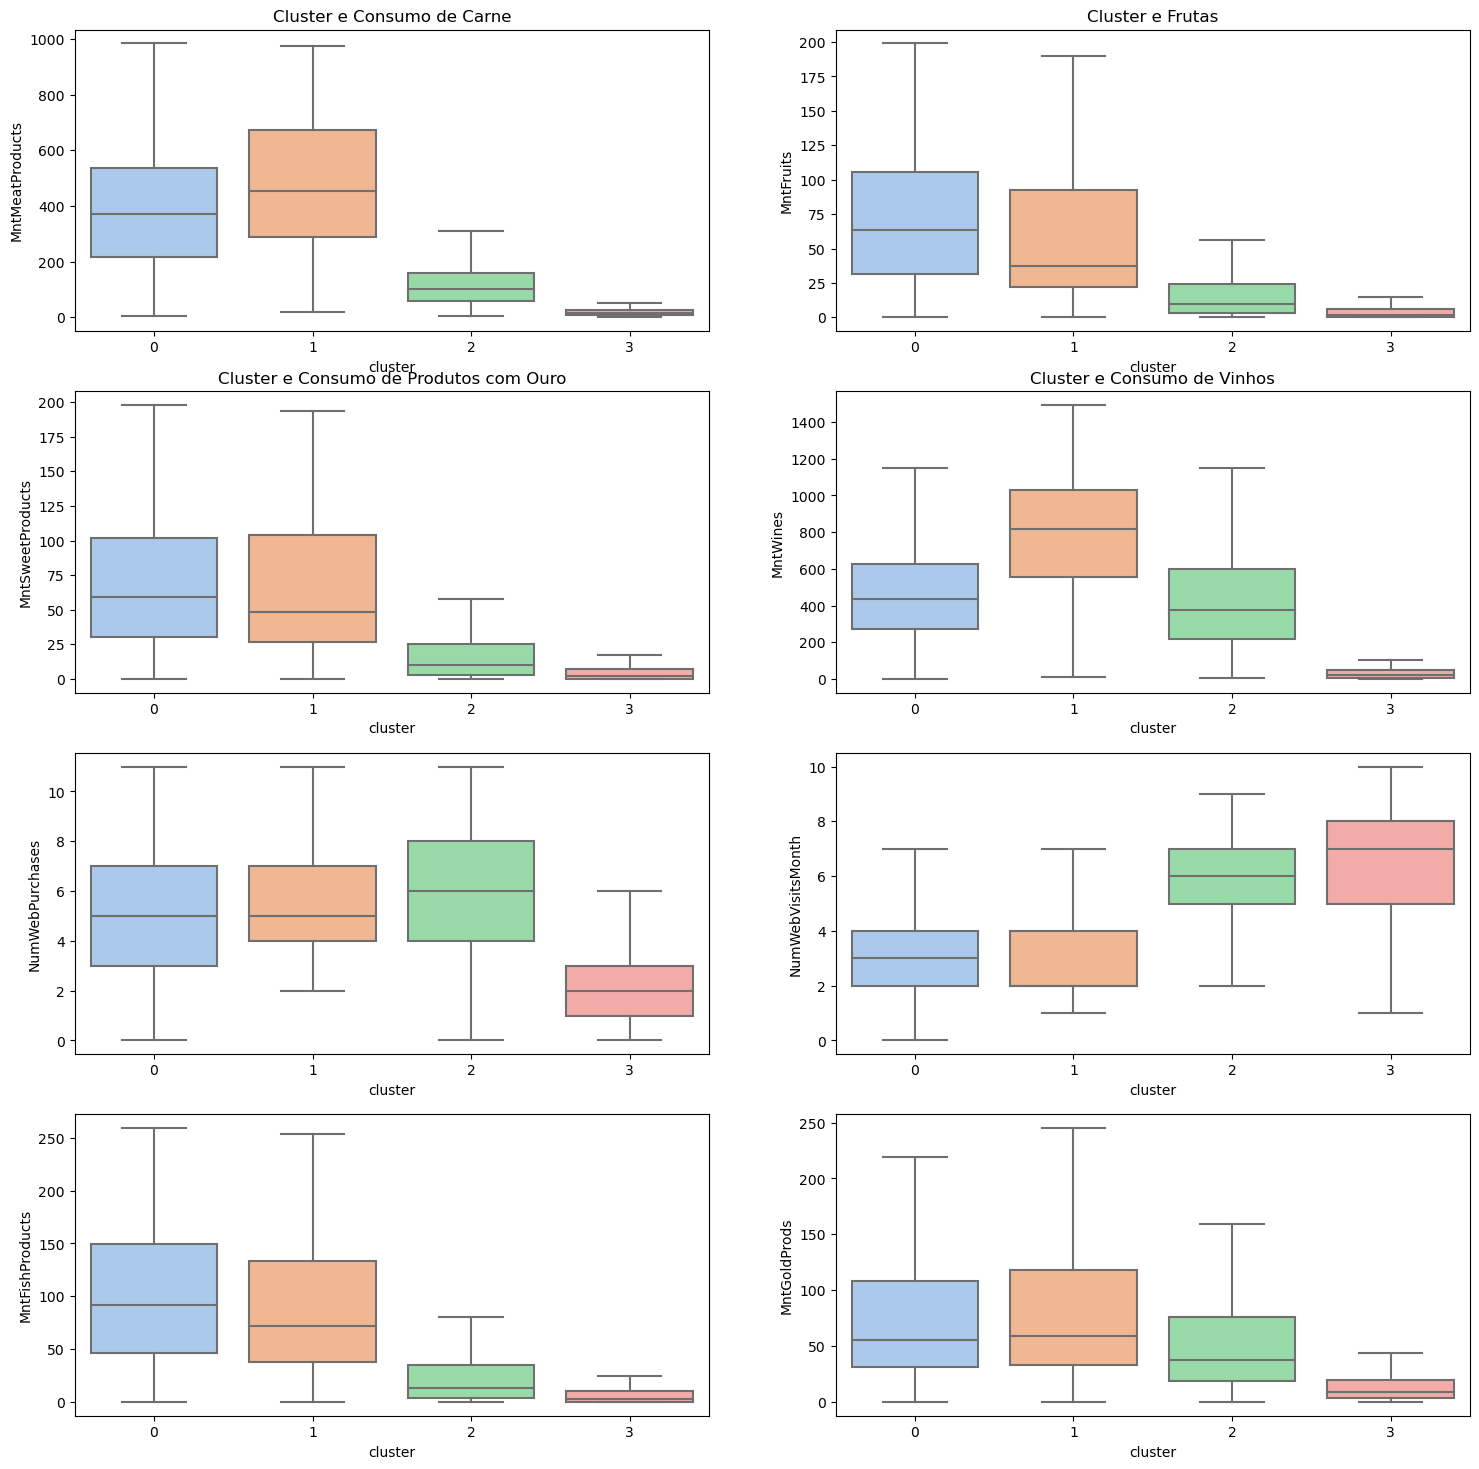

In [295]:
# Definição da Área de Plot 
fig, ax = plt.subplots(4,2, figsize=(18,18))

# Axes [0,0]
sns.boxplot(x='cluster', y='MntMeatProducts', data=df_kmeans, showfliers=False, palette='pastel', ax=ax[0,0])
ax[0,0].set_title('Cluster e Consumo de Carne')

# Axes [0,1]
sns.boxplot(x='cluster', y='MntFruits', data=df_kmeans, showfliers=False, palette='pastel', ax=ax[0,1])
ax[0,1].set_title('Cluster e Frutas')

# Axes [1,0]
sns.boxplot(x='cluster', y='MntSweetProducts', data=df_kmeans, showfliers=False, palette='pastel', ax=ax[1,0])
ax[1,0].set_title('Cluster e Consumo de Doces')

# Axes [1,1]
sns.boxplot(x='cluster', y='MntWines', data=df_kmeans, showfliers=False, palette='pastel', ax=ax[1,1])
ax[1,1].set_title('Cluster e Consumo de Vinhos')

# Axes [2,0]
sns.boxplot(x='cluster', y='NumWebPurchases', data=df_kmeans, showfliers=False, palette='pastel', ax=ax[2,0])
ax[1,0].set_title('Cluster e Compras Onlines')

# Axes [2,1]
sns.boxplot(x='cluster', y='NumWebVisitsMonth', data=df_kmeans, showfliers=False, palette='pastel', ax=ax[2,1])
ax[1,0].set_title('Cluster e Visitas feitas no site no mês')

# Axes [3,0]
sns.boxplot(x='cluster', y='MntFishProducts', data=df_kmeans, showfliers=False, palette='pastel', ax=ax[3,0])
ax[1,0].set_title('Cluster e Consumo de Peixes')

# Axes [3,1]
sns.boxplot(x='cluster', y='MntGoldProds', data=df_kmeans, showfliers=False, palette='pastel', ax=ax[3,1])
ax[1,0].set_title('Cluster e Consumo de Produtos com Ouro')

Verifica-se uma diferença na renda anual dos consumidores agrupado nos 4 clusters. O cluster 1, por exemplo, apresenta uma renda anual superior aos outros clusters, apresentando um consumo superior de carne, ouro e vinho. Quando comparado com o cluster 0, que apresenta uma alta renda anual, temos uuma tendência dos consumidores do 0 consumirem pouco vinho, mas muita fruta. 

Já o cluster 3, com renda anual inferior aos demais, apresenta pouco consumo médio de carne, ouro e vinhos. 

In [293]:
df_kmeans.groupby('cluster').mean()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp5,AcceptedCmp1,Complain,idade
cluster,,,,,,,,,,,,,,,,,,,,
0,1.868545,2.446009,70956.983568,0.058685,0.258216,49.150235,481.291080,71.983568,401.983568,100.913146,70.441315,75.981221,1.514085,5.262911,8.539906,3.044601,0.000000,0.000000,0.011737,46.638498
1,1.906977,2.534884,83307.548837,0.046512,0.093023,49.660465,807.827907,59.069767,480.195349,90.000000,67.544186,80.618605,1.032558,5.488372,8.297674,2.948837,0.730233,0.581395,0.004651,46.386047
2,1.865672,2.656716,56580.769486,0.248756,0.971808,48.694859,438.747927,17.767828,125.641791,24.592040,18.597015,56.301824,3.865672,6.126036,7.346600,5.824212,0.009950,0.029851,0.003317,51.278607
3,2.117470,2.413655,33657.537149,0.813253,0.419679,49.223896,37.688755,4.857430,23.814257,6.916667,4.896586,15.018072,2.018072,2.042169,3.130522,6.491968,0.000000,0.001004,0.013052,42.884538


Com base nessas informações, podemos extrair algumas informações relevantes para segmentar o nosso público:

  0. Vida Saudável: segmento de consumidores de alta renda anual que apresentam consumo alto de frutas, mas baixo de vinhos.  
  1. Bem da vida: segmento de consumidores com maior renda da amostra, que não apresentam filhos ou aodlescentes em casa, apresentando um nível elevado de consumo de carnes e vinhos, e produtos com ouro.
  2. Pais de Renda Média: segmento de consumidores com presença de crianças e adolescentes em casa. Apresentam um consumo alto de vinho, assemelhando-se ao cluster 0. Por conta da possível vida agitada, apresentam uma alta recorrência no uso de aplicativos. 
  3. Segmento de Baixa Renda: segmento de consumidores com renda anual baixa, gerando uma relação de baixo consumo. Uma relação que pode ser observada, é que apesar de acessarem bastante a internet, esse acesso não converte em compras.  
  